# Task 06 - Logistic regression
## Pattern Recognition and Machine Learning

In [6]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from logreg import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BONUS TASK
Implement the logistic regression with dimension lifting as shown in the following figure from [1]. The figure assumes w being the class label and ϕ the sought vector. Generate similar outputs to verify a successful implementation.
<img src="prince_nonlin_logreg.png" alt="Example of output" style="width:500px;height:600px;">
[1] Simon J. D. Prince, Computer Vision: Models, Learning and Inference, 2012 

## Generate data

In [7]:
x1 = np.random.normal(-2,0.25,10)
x1 = np.append(x1,np.random.normal(2,0.5,10))

x2 = np.random.normal(-2,1,20)

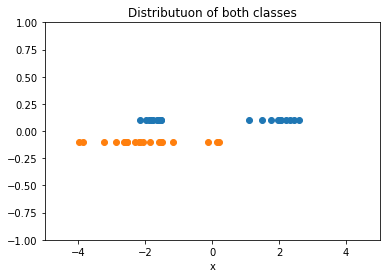

In [8]:
plt.scatter(x1,np.ones(20)*0.1)
plt.scatter(x2,-np.ones(20)*0.1)
plt.xlim([-5,5])
plt.ylim([-1,1])
plt.xlabel('x')
plt.title('Distributuon of both classes')
plt.savefig('BONUS_dist_both_classes.png')

## Generate 7 tangeses in given space

In [9]:
X = np.ones((2,40))
X[1,:] = np.append(x1, x2)
y = np.append( np.ones(20), -np.ones(20) )

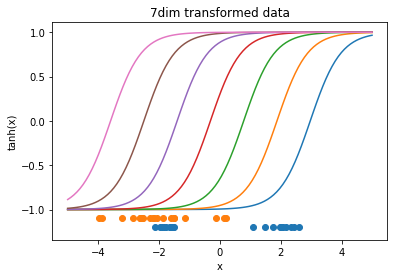

In [10]:
pk, tan_arr, w, alpha, aplha0 = logistic_regression_dim_lifting(X, y, np.ones(7), fno = 7)
for i in range(tan_arr.shape[0]):
    plt.plot(np.linspace(-5,5,100), tan_arr[i,:])
plt.scatter(x1,-np.ones(20)*1.2)
plt.scatter(x2,-np.ones(20)*1.1)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('7dim transformed data')
plt.savefig('BONUS_tanh.png')

## Weighted sum of nonlinear functions

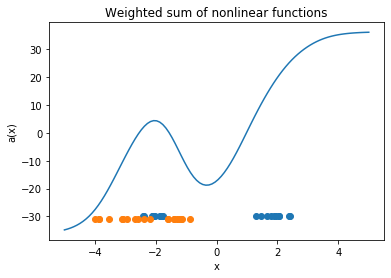

In [140]:
plt.plot(np.linspace(-5,5,100), pk)
plt.scatter(x1,-np.ones(20)*30)
plt.scatter(x2,-np.ones(20)*31)
plt.xlabel('x')
plt.ylabel('a(x)')
plt.title('Weighted sum of nonlinear functions')
plt.savefig('BONUS_a.png')

## Probability of first class

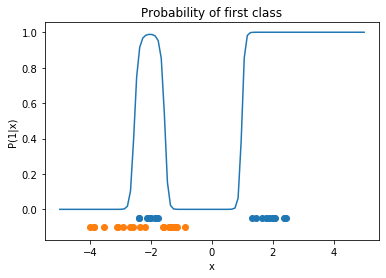

In [141]:
plt.plot(np.linspace(-5,5,100), 1/(1+np.exp(-pk)) )
plt.scatter(x1,-np.ones(20)*0.05)
plt.scatter(x2,-np.ones(20)*0.1)
plt.xlabel('x')
plt.ylabel('P(1|x)')
plt.title('Probability of first class')
plt.savefig('BONUS_probability.png')

## Creating test data

In [11]:
xt1 = np.random.normal(-2,0.25,5)
xt1 = np.append(xt1,np.random.normal(2,0.5,5))

xt2 = np.random.normal(-2,1,10)

XT = np.append(xt1, xt2)
y = np.append( np.ones(10), -np.ones(10) )

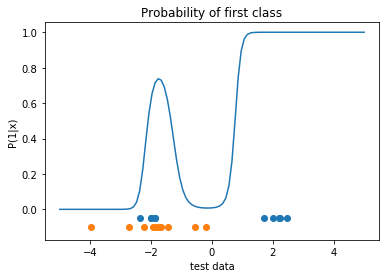

In [12]:
plt.plot(np.linspace(-5,5,100), 1/(1+np.exp(-pk)) )
plt.scatter(xt1,-np.ones(10)*0.05)
plt.scatter(xt2,-np.ones(10)*0.1)
plt.xlabel('test data')
plt.ylabel('P(1|x)')
plt.title('Probability of first class')
plt.savefig('BONUS_test.png')

In [13]:
XT = np.repeat(XT.reshape(1, XT.shape[0]), 7, 0)
tanh_a = np.tanh( XT*aplha0 + alpha )

In [14]:
pkt = w[1:].dot(tanh_a)

In [15]:
labels = np.ones(20)
labels[pkt<0.5] = -1

In [16]:
err = np.sum(np.abs(y-labels))/2/XT.shape[1]
print('error: ', err)

error:  0.3


## Comparison of both test and training data

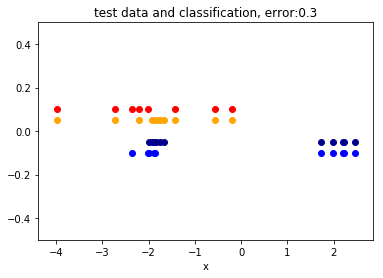

In [17]:
plt.scatter(xt1,-np.ones(10)*0.1, color='b')
plt.scatter(xt2,np.ones(10)*0.05, color='orange')
plt.scatter(XT[0,labels==1],-np.ones(XT[0,labels==1].shape[0])*0.05, color = 'darkblue')
plt.scatter(XT[0,labels==-1],np.ones(XT[0,labels==-1].shape[0])*0.1, color = 'r')
plt.ylim([-0.5,0.5])
plt.title('test data and classification, error:'+str(err))
plt.xlabel('x')
plt.savefig('BONUS_test_error.png')